In [10]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy import fftpack
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
mu = 6.3
sigma = np.sqrt(mu)
# compute the probability that in a single year are observed 15 or more hurricances.
n = 15
prob = 100*(mu**n/np.math.factorial(n))*np.exp(-1*mu)

# coumpute Z-value
Z = abs(mu - n) / sigma
print("Probability that {:.0f} hurricane are observed in a year: {:.4f}%".format(n,prob))
print("Z-value: %.2f"%(Z))
print("The probability that in a year are observed {} hurricanes is".format(n), 'statistically significant' if Z>3 else 'not statistically significant')


Probability that 15 hurricane are observed in a year: 0.1373%
Z-value: 3.47
The probability that in a year are observed 15 hurricanes is statistically significant


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)
mu_pre  = np.mean(pre)
mu_post = np.mean(post)
sigma_pre  = np.sqrt(np.var(pre, ddof=1)) 
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2+sigma_post**2)/2)
T = (mu_post-mu_pre)/(sigma*np.sqrt(2/n))
print("The variable T has a value of: {:.4}".format(T))

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("The p-value of the t-student test is {:.4}, which is".format(pvalue),'statistically relevant' if pvalue>3 else 'statistically irrelevant')

The variable T has a value of: 3.787
The p-value of the t-student test is 1.996, which is statistically irrelevant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

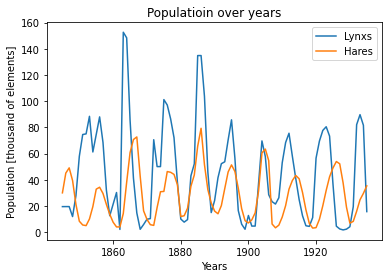

Linxs peak frequency:0.08791
Hares peak frequency: 0.09890
Linxs peak period: 11.38
Hares peak period: 10.11


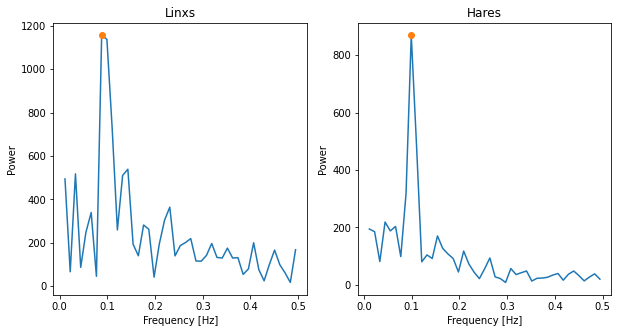

In [16]:
# read data
link = 'http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
df = pd.read_csv(link,sep=' ' ,header = None, index_col=False, names=['year','lynxs','hares'])

# quick plot of populations
fig, ax = plt.subplots()
ax.plot(df['year'],df['lynxs'],label='Lynxs')
ax.plot(df['year'],df['hares'], label='Hares')
ax.set(title='Populatioin over years', ylabel='Population [thousand of elements]', xlabel='Years')
ax.legend()
plt.show()

# Lynx
# perform a periodicity analysis
l_fft = fftpack.fft(np.array(df['lynxs']))
l_power = np.abs(l_fft)
l_freq = fftpack.fftfreq(df['lynxs'].size, d=1.)

# Find the peak frequency: focus only on only the positive frequencies
l_freq_f = l_freq[np.where(l_freq > 0)]
l_power_f = l_power[np.where(l_freq > 0)]
l_peak_freq = l_freq_f[l_power_f.argmax()]
l_peak_power = l_power_f[l_power_f.argmax()]

# Hares
# perform a periodicity analysis
h_fft = fftpack.fft(np.array(df['hares']))
h_power = np.abs(h_fft)
h_freq = fftpack.fftfreq(df['hares'].size, d=1.)

# Find the peak frequency: focus only on only the positive frequencies
h_freq_f = h_freq[np.where(h_freq > 0)]
h_power_f = h_power[np.where(h_freq > 0)]
h_peak_freq = h_freq_f[h_power_f.argmax()]
h_peak_power = h_power_f[h_power_f.argmax()]

print("Linxs peak frequency:{:.5f}".format(l_peak_freq))
print("Hares peak frequency: {:.5f}".format(h_peak_freq))
print("Linxs peak period: {:.2f}".format(1/l_peak_freq))
print("Hares peak period: {:.2f}".format(1/h_peak_freq))

# Plot the FFT power
fig_fft, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.plot(l_freq_f, l_power_f)
ax1.plot(l_peak_freq, l_peak_power, marker='o')
ax1.set(xlabel='Frequency [Hz]', ylabel='Power', title='Linxs')
ax2.plot(h_freq_f, h_power_f)
ax2.plot(h_peak_freq, h_peak_power, marker='o')
ax2.set(xlabel='Frequency [Hz]', ylabel='Power', title='Hares')
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

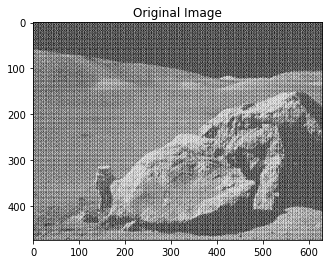

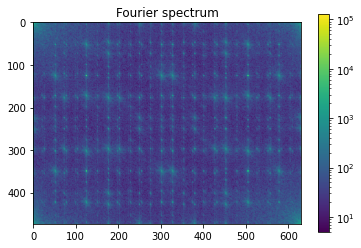

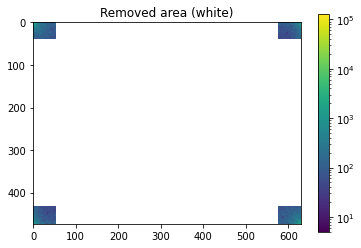

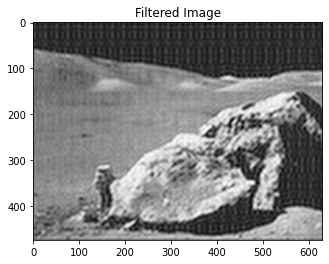

In [53]:
im = plt.imread('moonlanding.png')
greys = cm.get_cmap('Greys_r')
plt.imshow(im, cmap=greys)
plt.title('Original Image')

# perform 2d fft
fft = fftpack.fft2(im)
power = np.abs(fft)

#plot fourier analysis
plt.figure()
from matplotlib.colors import LogNorm
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier spectrum')

# Array slicing
k = 0.09
filt_fft = fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = filt_fft.shape

# Remove the central region where there is periodic noise:
filt_fft[int(r*k):int(r*(1-k))] = 0
filt_fft[:, int(c*k):int(c*(1-k))] = 0
# Plot removed part
plt.figure()
plt.imshow(np.abs(filt_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Removed area (white)')
#plt.show()

# Restore image
restored = fftpack.ifft2(filt_fft).real
plt.figure()
plt.imshow(restored, cmap=greys)
plt.title('Filtered Image')
plt.show()